In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
efile = '../data/epi/nnk7_rd2_full.npy'

epi = np.load(efile)
print(epi.shape) # [L, L, 20, 20]

(8, 8, 20, 20)


In [67]:
ALPHABET = 'ACDEFGHIKLMNPQRSTVWY'

for p1 in range(epi.shape[0]):
    for p2 in range(epi.shape[0]):
        slice = epi[p1, p2, :, :]
        # thresh = 0.3
        # if slice.max() > thresh: # self-epi is always 0, so is duplicate/diagonal
        #     loc = np.where(slice == slice.max())
        #     print('Positions %s and %s' % (str(p1 + 1), str(p2 + 1)))
        #     print('MAX:', ALPHABET[loc[0][0]], ALPHABET[loc[1][0]], round(slice.max(), 2))

        if slice.min() < -1.0:
            loc = np.where(slice == slice.min())
            print('Positions %s and %s' % (str(p1 + 1), str(p2 + 1)))
            print('MIN:', ALPHABET[loc[0][0]], ALPHABET[loc[1][0]], round(slice.min(), 2))

        

Positions 4 and 5
MIN: D C -1.71
Positions 5 and 6
MIN: D C -1.75
Positions 6 and 7
MIN: D C -1.2
Positions 7 and 8
MIN: D C -1.77


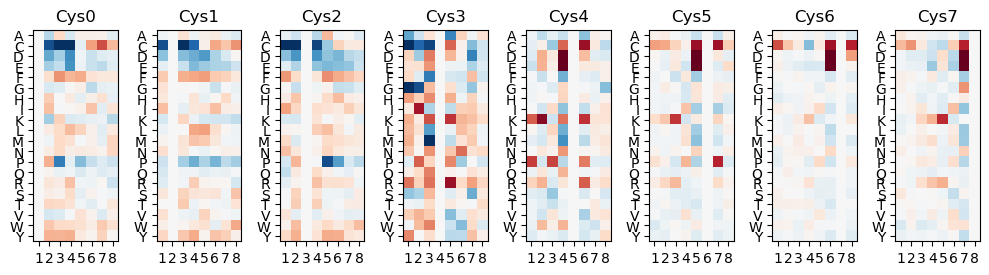

In [55]:

fig, ax = plt.subplots(1, 8)
fig.set_size_inches(10, 10)

for p in range(0, 8):
    pos = p
    aa = ALPHABET.index('C')
    
    # get the epi data for a specific position/amino acid combo
    chunk = epi[pos, :, aa, :].T + epi[:, pos, :, aa].T
    im = ax[p].imshow(chunk, cmap='RdBu', vmin=-1, vmax=1)

    ax[p].set_xticks(np.arange(8), np.arange(8) + 1)
    # if p == 0:
    ax[p].set_yticks(np.arange(20), ALPHABET)
    ax[p].set_title('Cys%s' % str(p))
    # else:
        # ax[p].set_yticklabels([] * 20)

# fig.colorbar(im, ax=ax.ravel().tolist())

plt.tight_layout()